# Gaussian chain segmental distribution


In [269]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [270]:
R=1

In [271]:
4*np.pi*(1.1e-6)**3/3/(4*np.pi*(0.75e-6)**3/3)

3.154962962962964

In [272]:
epsi=np.linspace(0,1,20)
x=(3*epsi**2-3*epsi+1)
y=(3*epsi**2-3*epsi+1)

Text(0, 0.5, 'amplitude')

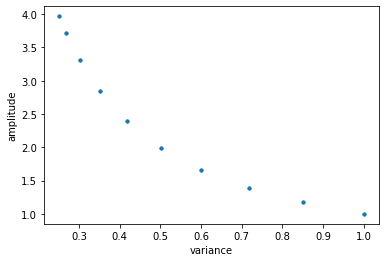

In [273]:
#plt.plot(epsi,x)
plt.plot(x,1/y,'.')
plt.xlabel('variance')
plt.ylabel('amplitude')

## Unperturbed Gaussian Chain

In [309]:
r=np.linspace(-2,2,1000)

In [310]:
R=1
f = lambda x,r: np.exp(-2*r**2/(2*R**2*(3*x**2-3*x+1)))/(3*x**2-3*x+1)

In [311]:
dens=[]
for p in r:
    y, err = integrate.quad(f, 0, 1, args=(p,))
    dens.append(y)

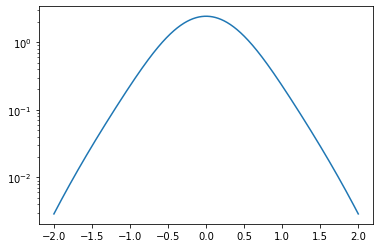

In [312]:
plt.semilogy(r,dens)

In [313]:
from scipy.optimize import curve_fit

In [314]:
def gfit(x,*args):
    amp = args
    n=50
    var_range=np.linspace(0.3,1,n)
    y=0
    for i,var in enumerate(var_range):
        y=y+amp[i]*np.exp(-x**2/(2*R**2*var))/var
    return(y)

In [315]:
n=50
var_range=np.linspace(0.3,1,n)

In [316]:
params = 1/np.linspace(0.3,1,n)


fitted_params,_ = curve_fit(gfit,r, np.array(dens), p0=params)


In [317]:
fitted_params

array([ 3.36450953e+03, -7.24098330e+03, -3.63481684e+02,  2.83863881e+03,
        5.15764495e+03,  9.58192746e+01, -4.92917377e+01,  1.13253508e+02,
       -4.77632818e+03, -7.71260957e+02, -1.45717016e+03, -8.14011643e+02,
        2.14485467e+00, -2.77101245e-01,  9.42795418e+00,  6.73650273e+01,
        4.01957102e+03,  4.68969002e+03, -4.91671680e+00,  5.91205630e-01,
       -2.03969952e+00,  2.78744842e-01, -1.54405243e+02,  1.97291284e-02,
       -7.05206202e+03, -2.73314599e-02, -2.73928459e+00,  1.53807619e-03,
       -6.75612452e-02, -1.49739855e+03, -5.17239124e-02, -5.04330778e-01,
        3.46608352e+03,  7.39559261e+00, -4.03977247e+01, -2.52663621e-03,
       -3.86469081e+01,  1.41836856e-03,  3.67035652e+00,  3.47215340e+02,
        6.74332675e+02,  1.27312257e-01,  1.41342801e+03, -4.61026537e+01,
        9.76307631e+01,  2.54547559e+02, -1.03545701e+02, -9.76520120e-01,
       -7.99990046e+03,  5.79266668e+03])

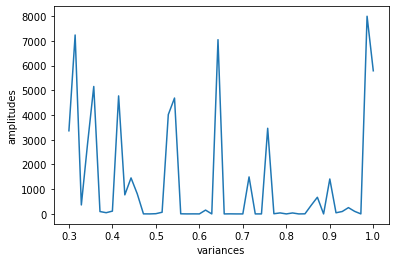

In [321]:
var_range=np.linspace(0.3,1,n)
plt.plot(var_range,np.abs(fitted_params))
plt.xlabel('variances')
plt.ylabel('amplitudes')
plt.show()

Text(0, 0.5, 'density')

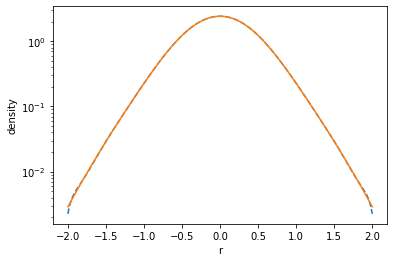

In [322]:
#r = np.linspace(0, np.max(x), 1000)
plt.semilogy(r, gfit(r, *fitted_params),'--')
plt.semilogy(r,dens)
plt.xlabel('r')
plt.ylabel('density')